In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
# np.meshgrid?
# np.linspace?
# np.zeros?
# plt.contourf?
# np.linalg.lstsq?

In [3]:
data_count = 100

In [4]:
x_tensor = torch.linspace(-5, 5, data_count)
x_variable = Variable(x_tensor)
x_np = x_tensor.numpy()

In [5]:
y_np = 2*x_np + 3

In [6]:
noise = np.random.normal(0, 0.1, data_count)

In [7]:
y_np = y_np + noise

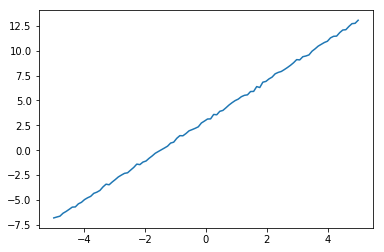

In [8]:
plt.plot(x_np, y_np)

In [9]:
x_np.shape
y_np.shape
noise.shape

(100,)

In [10]:
w_init = 1000.0
b_init = 1000.0
w = w_init
b = b_init

In [11]:
def forward(x):
    return x*w+b

In [12]:
def loss(x, y):
    y_pred = forward(y)
    return (y_pred-y)*(y_pred-y)

In [13]:
def gradient_w(x, y):
    # 优化的loss对w的梯度，使用链式法则进行求解
    return 2*(x*w+b-y)*x

In [14]:
def gradient_b(x, y):
    # 优化的loss对w的梯度，使用链式法则进行求解
    return 2*(x*w-y+b)

In [15]:
def gradient(x, y):
    g = np.zeros((2,1))
    g[0][0]=gradient_w(x,y)
    g[1][0]=gradient_b(x,y)
    return g

In [16]:
def hessian(x, y):
    h = np.zeros((2,2))
    h[0][0] = 2*x*x
    h[0][1] = 2*x
    h[1][0] = 2*x
    h[1][1] = 2
    return h

In [17]:
def gradient_netwon(x, y):
    h = hessian(x,y)
    h_elg_value, b_elg_vector = np.linalg.eig(h)
    h_elg_value_min = abs(min(h_elg_value))+0.01
#     print('h_elg_value_min:', h_elg_value_min)
    # 使得hessian逆矩阵存在：具体方法是求得原始h矩阵的特征值，去最小值进行消去即可
    h = (h+h_elg_value_min*np.eye(2))/(1+h_elg_value_min)
    try:
        h_inv = np.mat(h).I
        g = gradient(x,y)
#         print('h:', h)
#         print('g:', g)
        g_netwon = h_inv * g
        g_netwon_w = g_netwon[0]
        g_netwon_b = g_netwon[1]
        return g_netwon_w, g_netwon_b
    except np.linalg.LinAlgError:
        return None


In [18]:
# netwon_grad = gradient_netwon(x_np[11],y_np[11])

In [19]:
# hessian_exist = 0
# for i in range(data_count):
#     netwon_grad = gradient_netwon(x_np[i],y_np[i])
#     if netwon_grad is not None:
#         hessian_exist += 1
# print('hessian_exist:', hessian_exist)

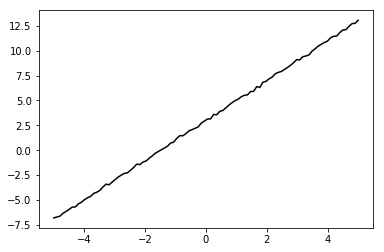

In [20]:
# 可以看出最后拟合的线越来越接近真实值，loss也越来越小，为了可视化w的学习过程，这里设置学习率eta为较小的值0.0001
y_enlarge = 1.0
eta = 0.01
# eta = 0.01
w_times = []
b_times = []
w_times.append(w)
b_times.append(b)
epoches = 1000
plt.plot(x_np, y_enlarge*y_np, color='black')
for epoch in range(epoches):
    for x_data, y_data in zip(x_np, y_np):
        grad_w, grad_b = gradient_netwon(x_data, y_data)
        loss_val = loss(x_data, y_data)
        w = w-eta*grad_w
        b = b-eta*grad_b
    w_times.append(np.array(w[0])[0][0])
    b_times.append(np.array(b[0])[0][0])
#     plt.plot(x_np, y_enlarge*forward(x_np))
#     print('loss_val:', loss_val)
#     print('w:', w)

In [21]:
w

matrix([[ 1.99971999]])

In [22]:
b

matrix([[ 2.98345763]])

In [23]:
grad_figure_enlarge_count = 2 * data_count
w_range = np.linspace(-w_init*1.5, w_init*1.5, grad_figure_enlarge_count)
b_range = np.linspace(-b_init*1.5, b_init*1.5, grad_figure_enlarge_count)
w_mesh, b_mesh = np.meshgrid(w_range, b_range)

In [24]:
loss_np = np.zeros((grad_figure_enlarge_count, grad_figure_enlarge_count))
for row_index in range(grad_figure_enlarge_count):
    for col_index in range(grad_figure_enlarge_count):
        w_1 = w_mesh[row_index][col_index]
        b_1 = b_mesh[row_index][col_index]
#         print('w_1:', w_1)
#         print('b_1:', b_1)
        loss_val = 0.0
        for (x, y) in zip(x_np, y_np):
            loss_val += (w_1 * x + b_1 - y) * (w_1 * x + b_1 - y)
        loss_val /= data_count
        loss_np[row_index][col_index] = loss_val

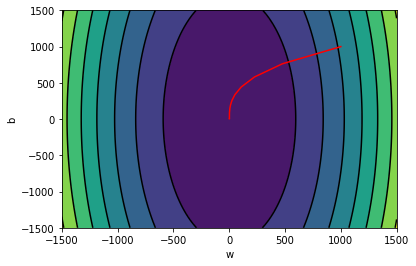

In [25]:
# [Contour Corner Mask](https://matplotlib.org/gallery/images_contours_and_fields/contour_corner_mask.html#sphx-glr-gallery-images-contours-and-fields-contour-corner-mask-py)
# [Contours 等高线图](https://morvanzhou.github.io/tutorials/data-manipulation/plt/3-3-contours/)
cs = plt.contourf(w_mesh, b_mesh, loss_np)
plt.contour(cs, colors='k')

loss_np_times = np.zeros(epoches)
for epoch in range(epoches):
    w_l = w_times[epoch]
    b_l = b_times[epoch]
    loss_val = 0.0
    for (x, y) in zip(x_np, y_np):
        loss_val += (w_1 * x + b_1 - y) * (w_1 * x + b_1 - y)
    loss_val /= data_count
    loss_np_times[epoch] = loss_val

plt.plot(w_times, b_times, c='r')
plt.xlabel('w')
plt.ylabel('b')
# plt.show()